In [97]:
################################
# Solves du/dt = u''           #
# With zero Dirichlet boundary #
################################
import radiant as rad
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['legend.fontsize'] = 'large'

# Problem Parameters
a = 0.
b = 1.
alpha = 0.25


def f(t, *x):
    return np.zeros_like(x[0])


def g(t, *x):
    return np.zeros_like(x[0])


def u0(*x):
    return np.prod(np.sin(np.pi * np.asarray(x)), axis=0)


def exact(t, *x):
    return np.exp(- np.pi ** 2 * alpha * t) * np.prod(np.sin(np.pi * np.asarray(x)), axis=0)

In [98]:
# Parameters
d = 1
k = 2
delta = 0.5
Ns = [200, 300, 400, 500, 600, 700, 800, 900, 1000]
tn = 100
tf = 1.

# Computed Parameters
ranges = ((a, b),) * d
Lidx = lambda cs: np.all([np.logical_and(c != a, c != b) for c in cs], axis=0)
Bidx = lambda cs: np.any([np.logical_or(c == a, c == b) for c in cs], axis=0)


L = lambda func: lambda *x: - alpha * func.laplacian(*x)
B = lambda func: lambda *x: func(*x)

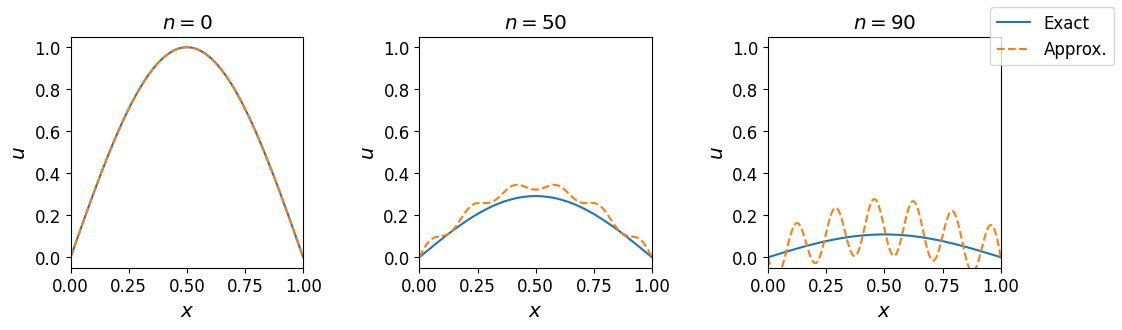

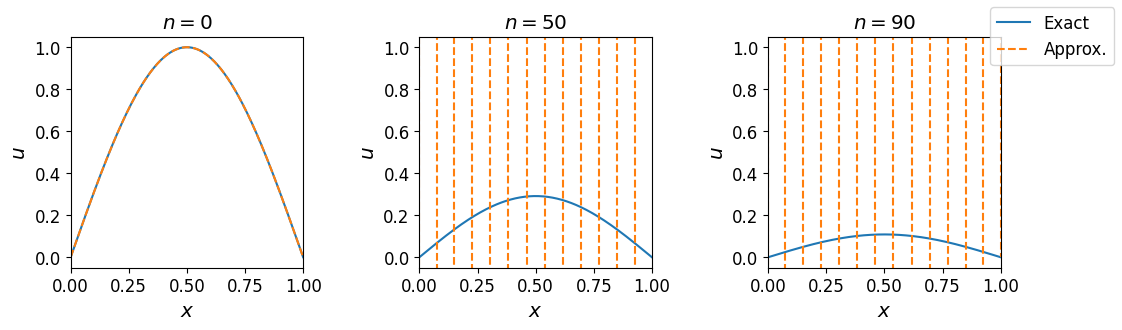

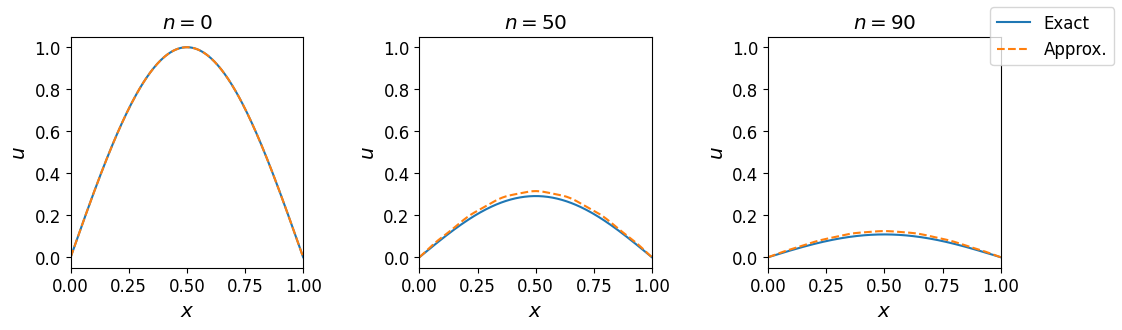

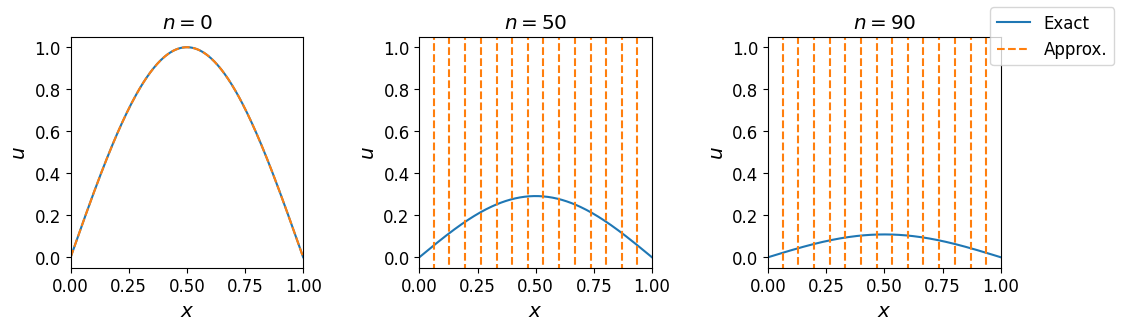

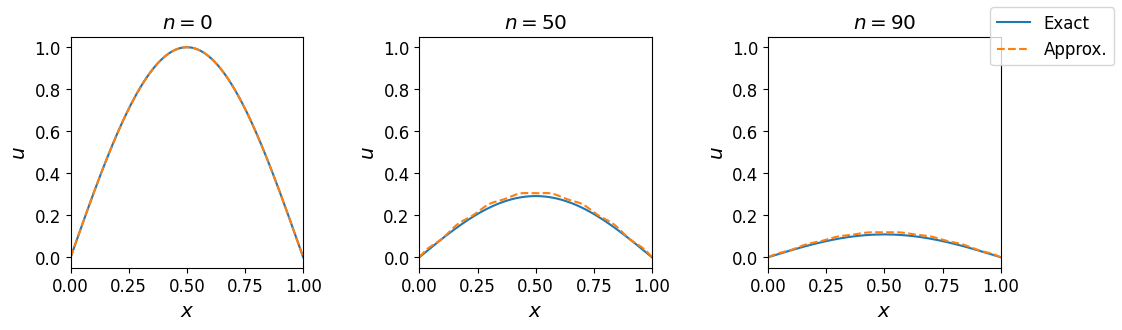

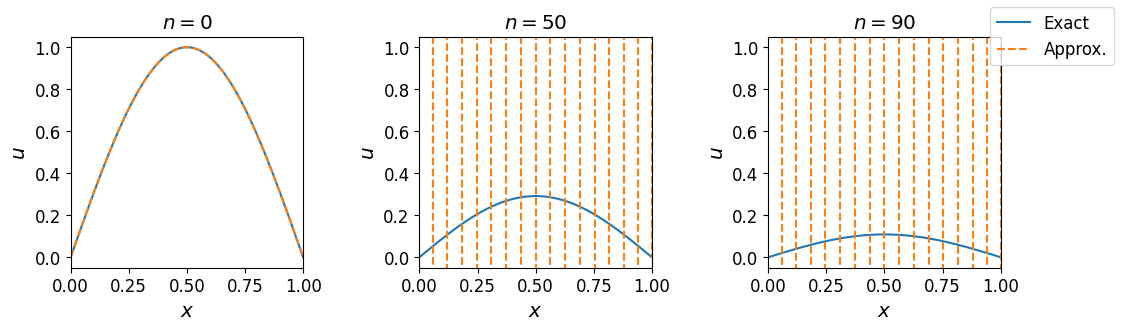

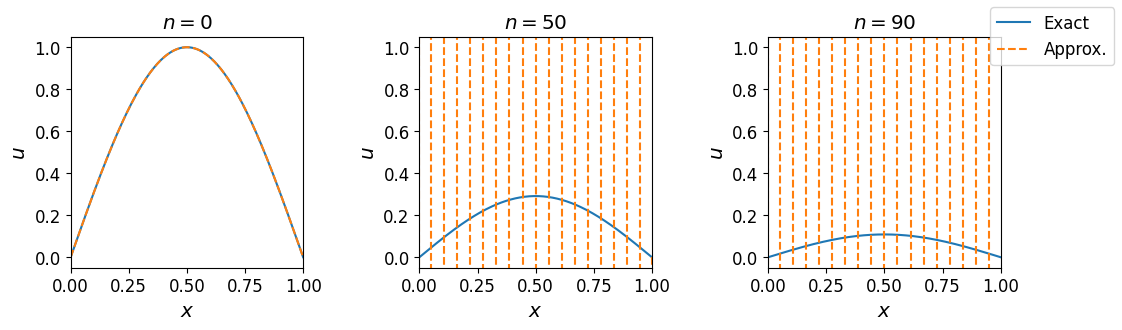

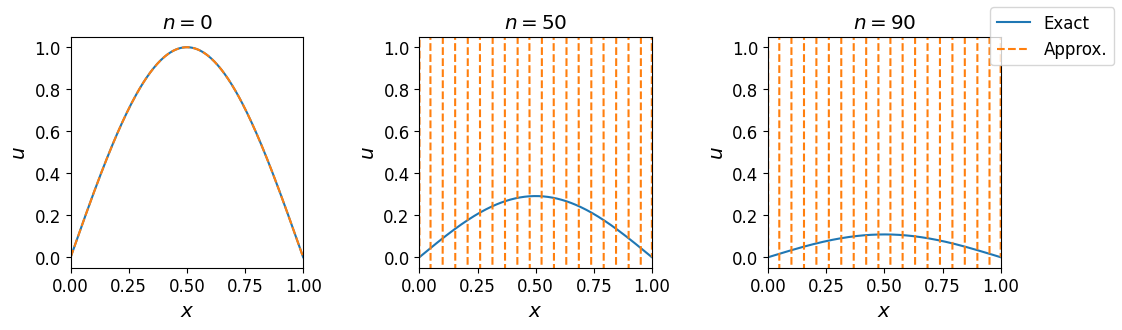

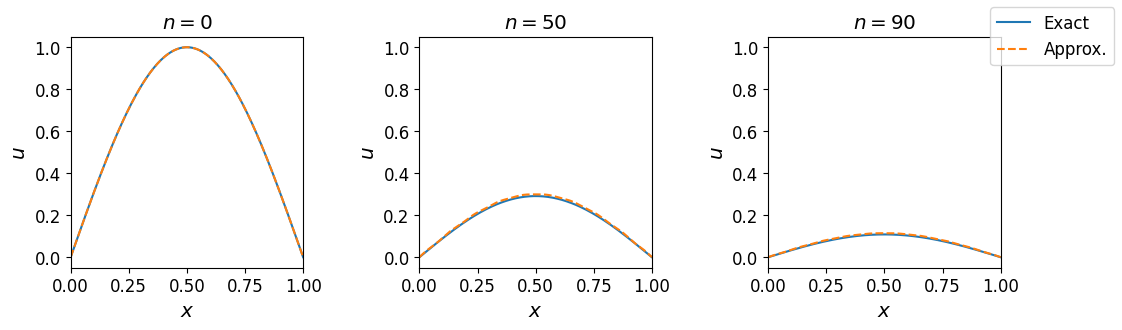

In [99]:
for N in Ns:
    xc = rad.gridn(ranges, N, flat=True)
    phi = rad.Wendland(d, k, delta, xc)
    solver = rad.solve.MOLCollocation(phi, L, Lidx, B, Bidx, tf, tn)
    approx = solver.solve(f, g, u0)
    
    fig, axs = plt.subplots(1, 3, figsize=(12, 3))
    
    x = np.linspace(a, b, 200)
    idxs = [0, 50, 90]
    
    for i, ax in enumerate(axs.flat):
        ax.margins(x=0.)
        ax.set_ylim(0. - plt.rcParams["axes.ymargin"], 1. + plt.rcParams["axes.ymargin"])
        
        idx = idxs[i]
            
        ax.plot(x, exact(idx * solver.dt, x), label="Exact")
        ax.plot(x, approx(idx, x), '--', label="Approx.")
        
        ax.set_xlabel(r'$x$')
        ax.set_ylabel(r'$u$')
        ax.set_title(f"$n = {idx}$")
        
    handles, labels = axs.flat[0].get_legend_handles_labels()
    fig.legend(handles, labels)
    plt.subplots_adjust(wspace=0.5)
    plt.savefig(f"figures/mol/results-{N}.pdf", bbox_inches='tight')